In [1]:
# Download Dataset from Kagle using Curl get
!wget https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1?select=haberman.csv

--2022-01-31 21:06:10--  https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1?select=haberman.csv
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: '1@select=haberman.csv.1'

     0K .......... .......... .......... .......... .......    2.02M=0.02s

2022-01-31 21:06:11 (2.02 MB/s) - '1@select=haberman.csv.1' saved [48982]



In [2]:
# Some info abt the dataset from Kaggle:

# Relevant Information:
# The dataset contains cases from a study that was conducted between
# 1958 and 1970 at the University of Chicago's Billings Hospital on
# the survival of patients who had undergone surgery for breast
# cancer.

# Number of Instances: 306

# Number of Attributes: 4 (including the class attribute)

# Attribute Information:

# Age of patient at time of operation (numerical)
# Patient's year of operation (year - 1900, numerical)
# Number of positive axillary nodes detected (numerical) MEANS # of small lump of tissue under armpits are axillary nodes

# Survival status (class attribute)
# 1 = the patient survived 5 years or longer
# 2 = the patient died within 5 year


Understaning Objective:
> Its survival data of Cancer patients

> So based on Patients age, year of operation, No of Auxil Nodes we can determine/predict if any new patient will survive more than 5 years or not.

In [3]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
haberman_data = pd.read_csv("haberman.csv", header=None)
haberman_data.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
# Assign name to each column as per Kaggle
haberman_data.columns = ['Patient_Age',"Operation_Year","Count_Auxil_Nodes","Survival_Status"]
haberman_data.head(10)

,Patient_Age,Operation_Year,Count_Auxil_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [6]:
# Changing 1 as Survived and 2 as RIP as per info Kaggle Info
haberman_data['Survival_Status'] = haberman_data['Survival_Status'].replace({1:'Survived',2:'RIP'})
haberman_data.head(10)

,Patient_Age,Operation_Year,Count_Auxil_Nodes,Survival_Status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived
5,33,58,10,Survived
6,33,60,0,Survived
7,34,59,0,RIP
8,34,66,9,RIP
9,34,58,30,Survived


In [7]:
# Check total # of rows and cols
haberman_data.shape

(306, 4)

In [8]:
# Check if any column in df has any null values. If yes then drop that row
haberman_data.isna().sum()

Patient_Age          0
Operation_Year       0
Count_Auxil_Nodes    0
Survival_Status      0
dtype: int64

Conclusions:
> No Null values encountered in any column

In [9]:
# Check if balanced Dataset: Datapoints of each group of Survival_Status
haberman_data['Survival_Status'].value_counts()

Survived    225
RIP          81
Name: Survival_Status, dtype: int64

Conclusion:
> The data is not balanced as 225 datapoints of patient survived but only 81 with other group

In [10]:
print(haberman_data.describe())


       Patient_Age  Operation_Year  Count_Auxil_Nodes
count   306.000000      306.000000         306.000000
mean     52.457516       62.852941           4.026144
std      10.803452        3.249405           7.189654
min      30.000000       58.000000           0.000000
25%      44.000000       60.000000           0.000000
50%      52.000000       63.000000           1.000000
75%      60.750000       65.750000           4.000000
max      83.000000       69.000000          52.000000


Conclusions:

> Mean: There is quite difference btw mean and Median (50%) of Count_Auxil_Nodes, There by hinting towards the presence of Outliers in Count_Auxil_Nodes data

> 75% of Patients are age less than equals 60 and has Count_Auxil_Nodes less than equals 4.

> 25% of Patients dont have any Auxil_Nodes

In [11]:
# Highlitiging presence of Outliers in Count_Auxil_Nodes data
haberman_data['Count_Auxil_Nodes'].describe().loc[['mean','50%']]

mean    4.026144
50%     1.000000
Name: Count_Auxil_Nodes, dtype: float64

In [12]:
# Individually examining the data of living pateients

living_pateints = haberman_data.loc[haberman_data["Survival_Status"] == 'Survived'];
dead_pateints = haberman_data.loc[haberman_data["Survival_Status"] == 'RIP'];
dead_pateints

,Patient_Age,Operation_Year,Count_Auxil_Nodes,Survival_Status
7,34,59,0,RIP
8,34,66,9,RIP
24,38,69,21,RIP
34,39,66,0,RIP
43,41,60,23,RIP
...,...,...,...,...
286,70,58,4,RIP
293,72,63,0,RIP
299,74,65,3,RIP
304,78,65,1,RIP


### PDF and CDF of Patients not survived ###

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


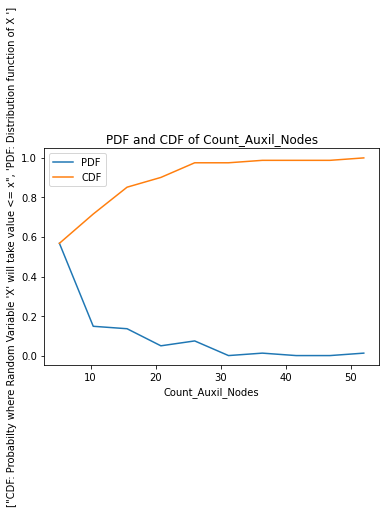

In [13]:
#Plot CDF of Count_Auxil_Nodes

counts, bin_edges = np.histogram(dead_pateints['Count_Auxil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)


#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)

# PDF Plot
# plt.show();


plt.plot(bin_edges[1:], cdf)

# Adding Title and Legends and Labels
plt.title("PDF and CDF of Count_Auxil_Nodes")
plt.legend(["PDF","CDF"])
plt.xlabel("Count_Auxil_Nodes")
plt.ylabel(["CDF: Probabilty where Random Variable 'X' will take value <= x",
            "PDF: Distribution function of X "])


plt.show();

Conclusion:
> Almost 90 % of patients who died had # of Auxil Nodes < 25
> Almost 50% of patients who died had # of Auxil Nodes <= 10

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


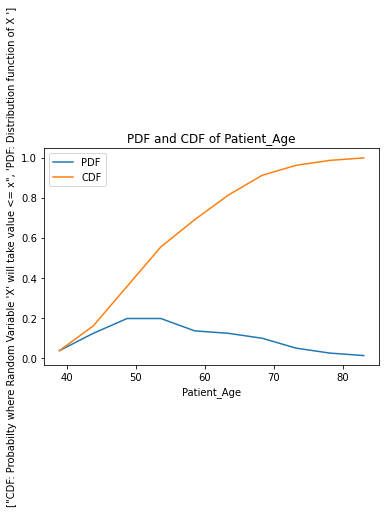

In [14]:
#Plot CDF of Patient_Age

counts, bin_edges = np.histogram(dead_pateints['Patient_Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)


#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)

# PDF Plot
# plt.show();


plt.plot(bin_edges[1:], cdf)

# Adding Title and Legends and Labels
plt.title("PDF and CDF of Patient_Age")
plt.legend(["PDF","CDF"])
plt.xlabel("Patient_Age")
plt.ylabel(["CDF: Probabilty where Random Variable 'X' will take value <= x",
            "PDF: Distribution function of X "])

plt.show();

Conclusion:
> Probability that patient_age < 45 will die is < 20
> risk of death is higher (>80 % ) for pateinets of age above 70

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


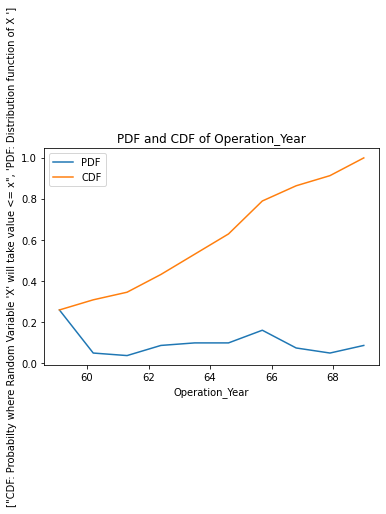

In [15]:
#Plot CDF of Operation_Year

counts, bin_edges = np.histogram(dead_pateints['Operation_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)


#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)

# PDF Plot
# plt.show();


plt.plot(bin_edges[1:], cdf)

# Adding Title and Legends and Labels
plt.title("PDF and CDF of Operation_Year")
plt.legend(["PDF","CDF"])
plt.xlabel("Operation_Year")
plt.ylabel(["CDF: Probabilty where Random Variable 'X' will take value <= x",
            "PDF: Distribution function of X "])



plt.show();

### PDF and CDF of Patients survived ###

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


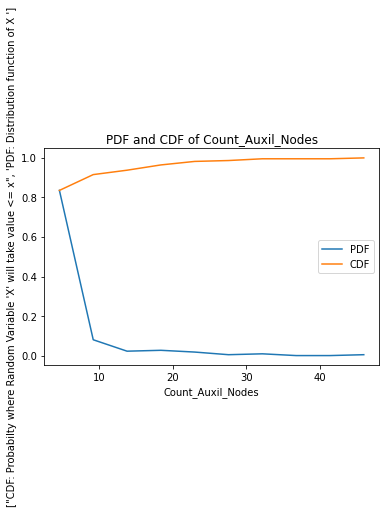

In [16]:
#Plot CDF of Count_Auxil_Nodes

counts, bin_edges = np.histogram(living_pateints['Count_Auxil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)


#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)

# PDF Plot
# plt.show();


plt.plot(bin_edges[1:], cdf)

# Adding Title and Legends and Labels
plt.title("PDF and CDF of Count_Auxil_Nodes")
plt.legend(["PDF","CDF"])
plt.xlabel("Count_Auxil_Nodes")
plt.ylabel(["CDF: Probabilty where Random Variable 'X' will take value <= x",
            "PDF: Distribution function of X "])


plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


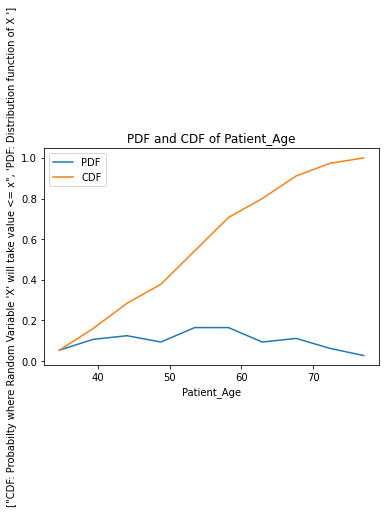

In [17]:
#Plot CDF of Patient_Age

counts, bin_edges = np.histogram(living_pateints['Patient_Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)


#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)

# PDF Plot
# plt.show();


plt.plot(bin_edges[1:], cdf)

# Adding Title and Legends and Labels
plt.title("PDF and CDF of Patient_Age")
plt.legend(["PDF","CDF"])
plt.xlabel("Patient_Age")
plt.ylabel(["CDF: Probabilty where Random Variable 'X' will take value <= x",
            "PDF: Distribution function of X "])


plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


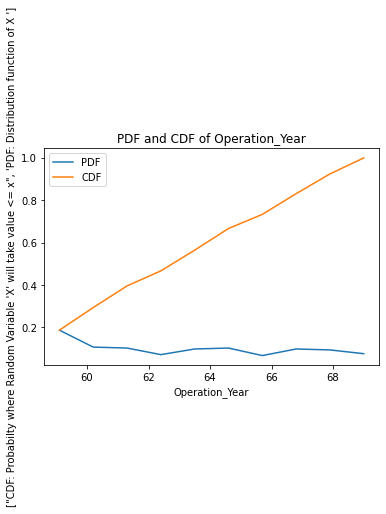

In [18]:
#Plot CDF of Operation_Year

counts, bin_edges = np.histogram(living_pateints['Operation_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)


#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)

# PDF Plot
# plt.show();


plt.plot(bin_edges[1:], cdf)

# Adding Title and Legends and Labels
plt.title("PDF and CDF of Operation_Year")
plt.legend(["PDF","CDF"])
plt.xlabel("Operation_Year")
plt.ylabel(["CDF: Probabilty where Random Variable 'X' will take value <= x",
            "PDF: Distribution function of X "])


plt.show();

### Combined Analysis of Patient survived and not survied based on one feature at a time###

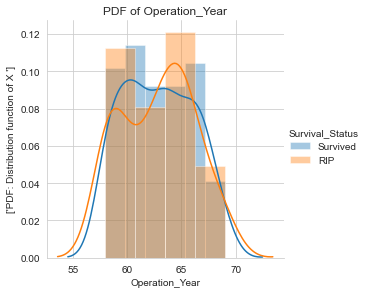

In [19]:
# PDF Plot

# Operation_year
sns.set_style("whitegrid");
sns.FacetGrid(haberman_data, hue="Survival_Status", height=4) \
   .map(sns.distplot, "Operation_Year") \
   .add_legend();
# Adding Title and Legends and Labels
plt.title("PDF of Operation_Year")

plt.xlabel("Operation_Year")
plt.ylabel(["PDF: Distribution function of X "])
plt.show();

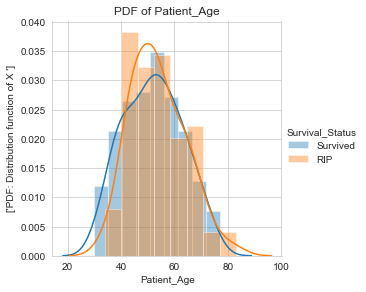

In [20]:
# Pateint Age
sns.set_style("whitegrid");
sns.FacetGrid(haberman_data, hue="Survival_Status", height=4) \
   .map(sns.distplot, "Patient_Age") \
   .add_legend();
# Adding Title and Legends and Labels
plt.title("PDF of Patient_Age")

plt.xlabel("Patient_Age")
plt.ylabel(["PDF: Distribution function of X "])
plt.show();

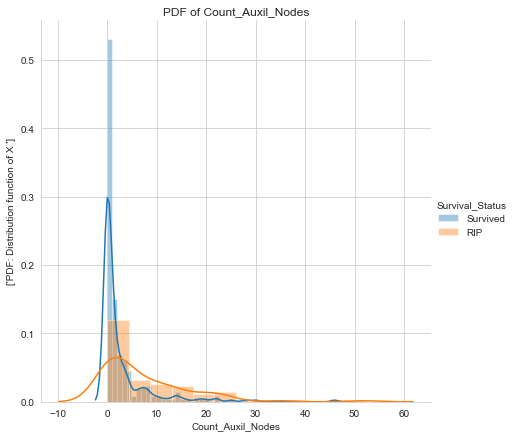

In [21]:
# Count_Auxil_Nodes
sns.set_style("whitegrid");
sns.FacetGrid(haberman_data, hue="Survival_Status", height=6) \
   .map(sns.distplot, "Count_Auxil_Nodes") \
   .add_legend();
# Adding Title and Legends and Labels
plt.title("PDF of Count_Auxil_Nodes")

plt.xlabel("Count_Auxil_Nodes")
plt.ylabel(["PDF: Distribution function of X "])
plt.show();

Conclusion:
> There is significant overlap of both histograms and PDfs ....Hence an inference is hard to make..

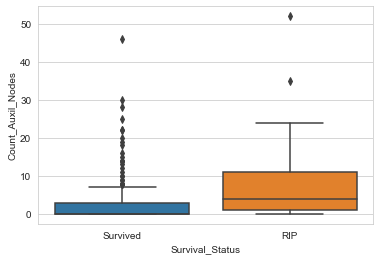

In [22]:
# Box Plot to see if any inference can be made

sns.boxplot(x='Survival_Status',y='Count_Auxil_Nodes', data=haberman_data)
plt.show()

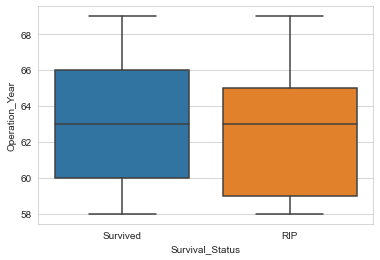

In [23]:
sns.boxplot(x='Survival_Status',y='Operation_Year', data=haberman_data)
plt.show()

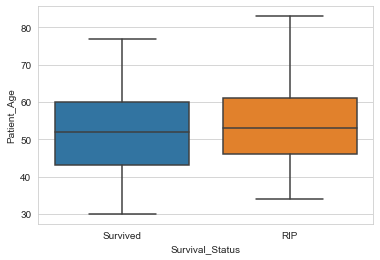

In [24]:
sns.boxplot(x='Survival_Status',y='Patient_Age', data=haberman_data)
plt.show()

### PairPlot : Taking all combination of features(2 at a time) ###

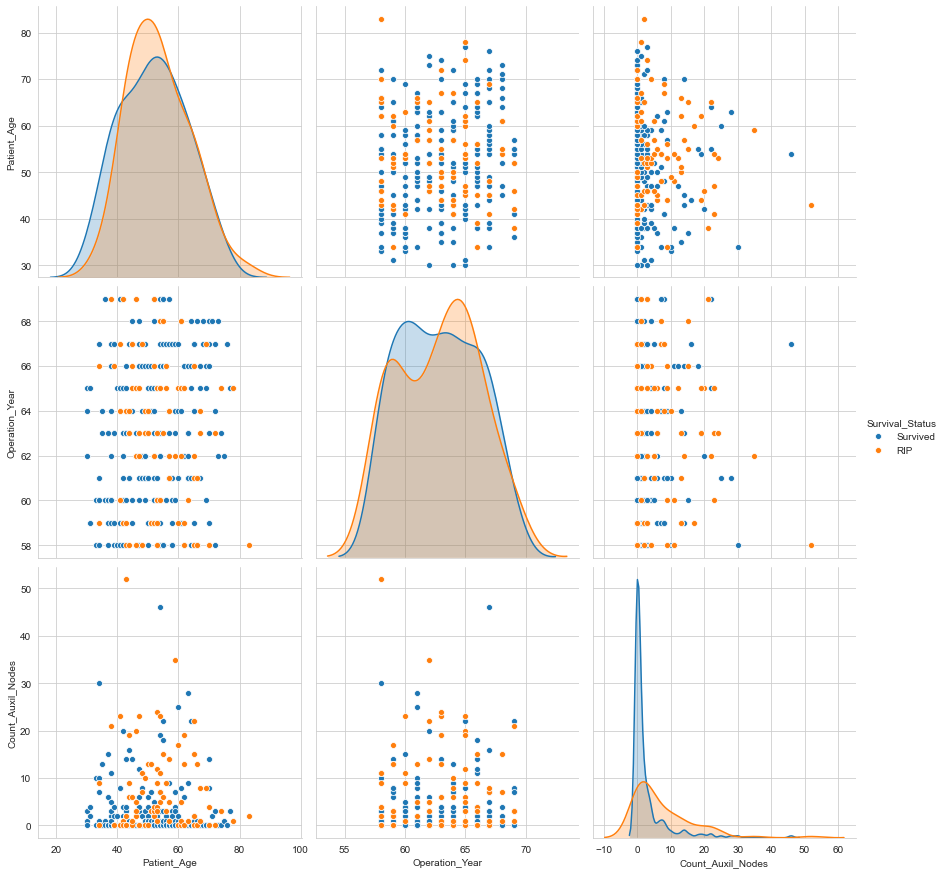

In [25]:
sns.pairplot(haberman_data, hue='Survival_Status', height=4)
plt.show()

# Final Conclusion:
> There is no seperation between data points either in scatter plot or pair plots.

>Hence more fetaures are required to make a classification between two classes.